/Users/megan.lee/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/megan.lee/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/megan.lee/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/megan.lee/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when


Cross-Validation Scores: [0.43859649 0.21052632 0.14035088 0.0877193  0.12280702 0.22807018
 0.22807018 0.1754386  0.36842105 0.625     ]

Average Cross-Validation Score: 0.2625
F1 score: 0.5148514851485149
Recall: 0.4126984126984127
Precision: 0.6842105263157895
AUC: 0.6507936507936507
Balanced accuracy: 0.6507936507936507


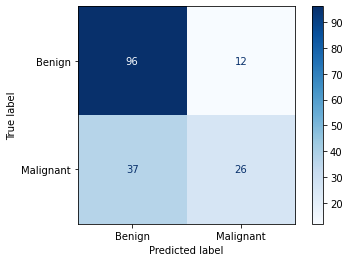

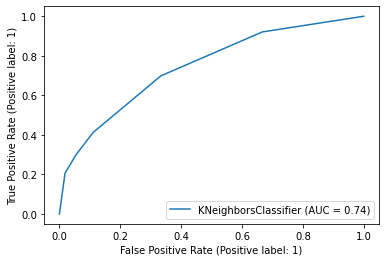

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, recall_score, precision_score, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score

# Load data from the CSV file
data = pd.read_csv('breast-cancer.csv')

# Separating features and target variable
X = data.drop(['diagnosis'], axis=1).values
y = data['diagnosis'].map({'M': 1, 'B': 0}).values.reshape(-1, 1) # convert to 0 and 1 labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a K-Nearest Neighbors classifier
model = KNeighborsClassifier(n_neighbors=5)

k = 10
cv_scores = cross_val_score(model, X, y, cv=k)

# Train the model on the training data
model.fit(X_train, y_train.ravel())

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Output for Cross Validation 
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())

# Outputs of the performance metrics
print("F1 score:", float(f1_score(y_test, y_pred)))
print("Recall:", float(recall_score(y_test, y_pred)))
print("Precision:", float(precision_score(y_test, y_pred)))
print("AUC:", float(roc_auc_score(y_test, y_pred)))
print("Balanced accuracy:", float(balanced_accuracy_score(y_test, y_pred)))


# Confusion matrix
plot_confusion_matrix(model, X_test, y_test, display_labels=['Benign', 'Malignant'], cmap=plt.cm.Blues)
plt.show()

# ROC curve
plot_roc_curve(model, X_test, y_test)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve

# Load data from CSV file
data = pd.read_csv('breast-cancer.csv')

# Separate features and target variable
X = data.drop(['diagnosis'], axis=1).values
y = data['diagnosis'].map({'M': 1, 'B': 0}).values.reshape(-1, 1) # convert to 0 and 1 labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a K-Nearest Neighbors classifier
model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
model.fit(X_train, y_train.ravel())

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Print the accuracy, F1 score, and confusion matrix of the classifier
print("Accuracy:", accuracy_sc